In [1]:
# Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
#checking Version of Tensorflow and Keras
print(f"Tensorflow version {tf.__version__}")
print(f"Keras version {tf.__version__}")

Tensorflow version 2.15.0
Keras version 2.15.0


In [4]:
os.getcwd()

'/content'

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

Check GPU/CPU

In [7]:
check_list=['CPU','GPU']

In [8]:
for device in check_list:
  out=tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is available:")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available")

CPU is available:
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is available:
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **Creating a simple classifier using Keras on MNIST dataset**

In [9]:
mnist=tf.keras.datasets.mnist

In [10]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [11]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [13]:
X_train_full.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
print(f"data type of X train full: {X_train_full.dtype}, \n shape of X train full: {X_train_full.shape}")

data type of X train full: uint8, 
 shape of X train full: (60000, 28, 28)


In [18]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [19]:
X_train_full[0].shape

(28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

In [31]:
#create a validation dataset from the full training dataset
#scale the data between 0 and 1 by dividing it by 255. as it is an unsigned data between 0-255 range
X_valid,X_train= X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [32]:
X_test=X_test/255

In [23]:
#TRAIN: 55000
#TEST:10000
#VALIDATION: 5000

In [24]:
len(X_train_full[5000:])

55000

In [25]:
#LET'S VIEW SOME DATA

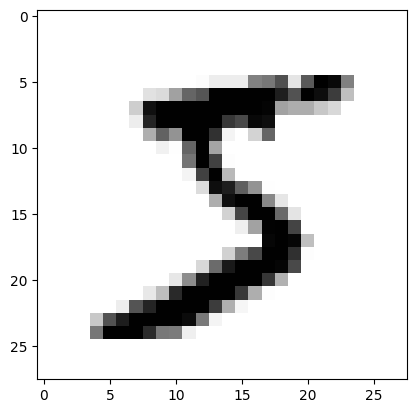

In [26]:
plt.imshow(X_train_full[0],cmap="binary")
plt.show()

<Axes: >

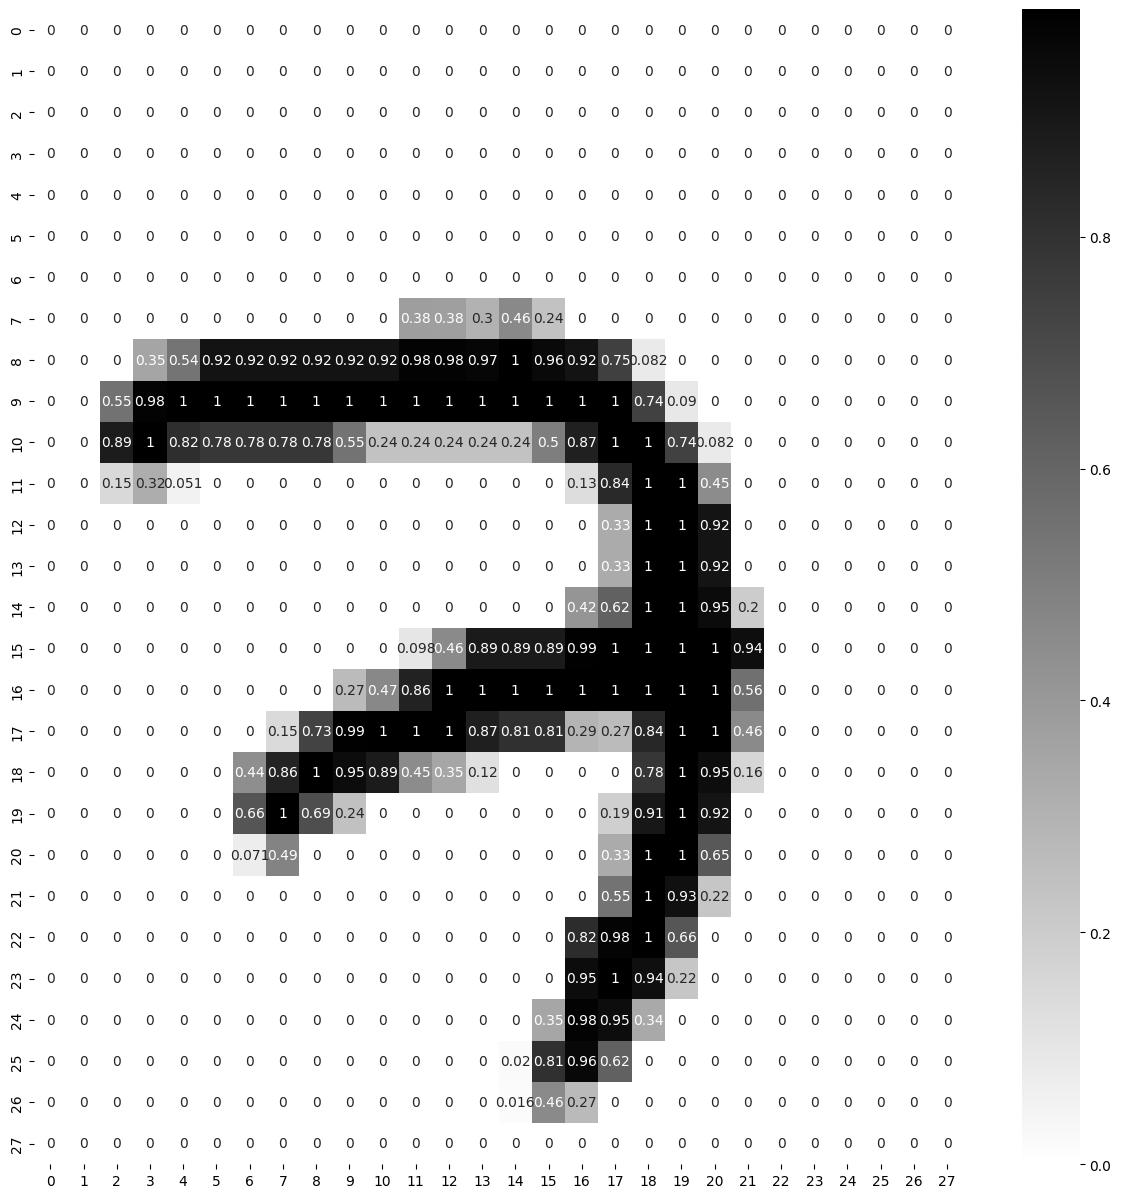

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

In [35]:
# the image is 2-d array of 28*28---> after flattening it will become 28*28=784 1-D
# SO IN INPUT LAYER --> Number of inputs neurons is 784
# In Output layer--> we have 10 neurons (as output is 0-9 and actfn used is softmax as it is multiclass classification)

**Creating layers of ANN**

**Method 1:**
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28], name='InputLayer'),
        tf.keras.layers.Dense(300,activation="relu", name="HiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu", name="HiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer")
]
model_clf=tf.keras.models.Sequential(LAYERS)

**Method 2:**

from keras.models import Sequential
from keras.layers import Dense, Flatten

#Define the model
model=Sequential()

model.add(Dense(units=64,activation="relu",input_dim=100))

model.add(Dense(units=10,activation="softmax"))


In [36]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28], name='InputLayer'),
        tf.keras.layers.Dense(300,activation="relu", name="HiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu", name="HiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer")
]
model_clf=tf.keras.models.Sequential(LAYERS)

In [38]:
# Method 2 of defining model
#from keras.models import Sequential
#from keras.layers import Dense, Flatten
#Define the model
#model=Sequential()

#model.add(Dense(units=64,activation="relu",input_dim=100))

#model.add(Dense(units=10,activation="softmax"))

In [39]:
model_clf.layers

In [40]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
#Hidden layer 1 trainable parameter= 784*300(weights)+300(biases)--> 235500
#Hidden layer 2 trainable parameter=300*100+100-->30100
#Output layer trainable parameter= 100*10+10--> 1010

In [42]:
#first_layer*second_layer+bias
784*300+300,300*100+100,100*10+10

(235500, 30100, 1010)

In [44]:
#Total_parameters to be trained
sum((235500, 30100, 1010))

266610

In [45]:
hidden1=model_clf.layers[1]

In [47]:
len(hidden1.get_weights())

2

In [49]:
hidden1.get_weights() #-->two arrays initial weights and initial biases

[array([[-0.03818752,  0.0136502 , -0.00777622, ..., -0.0430282 ,
         -0.0439968 , -0.04464733],
        [-0.06674723,  0.0080144 ,  0.03061456, ...,  0.01686943,
          0.03031304, -0.01459845],
        [ 0.0398466 , -0.03491689,  0.06063132, ..., -0.02339087,
          0.07136448, -0.0176846 ],
        ...,
        [-0.00336494, -0.06815924, -0.07380067, ...,  0.01365547,
         -0.06447396,  0.00886671],
        [-0.04126706, -0.06700196,  0.05651282, ...,  0.03065917,
          0.02619936,  0.00638264],
        [-0.0283375 , -0.00934994, -0.04700634, ...,  0.05878514,
         -0.02383907, -0.06785547]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [53]:
LOSS_FUNCTION="sparse_categorical_crossentropy" # use=>tf.losses.sparse_categorical_crossentropy
OPTIMIZER="SGD" # or use with custom learning rate=>tf.keras.optimizers.SGD(0.02)
METRICS=["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS

)

**TRAINING**

In [56]:
#training

EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,
                      batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5989 - accuracy: 0.8497 - val_loss: 0.3113 - val_accuracy: 0.9162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2875 - accuracy: 0.9181 - val_loss: 0.2416 - val_accuracy: 0.9330
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2357 - accuracy: 0.9322 - val_loss: 0.2039 - val_accuracy: 0.9458
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2019 - accuracy: 0.9423 - val_loss: 0.1783 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1773 - accuracy: 0.9496 - val_loss: 0.1600 - val_accuracy: 0.9566
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1577 - accuracy: 0.9552 - val_loss: 0.1472 - val_accuracy: 0.9592
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1418 - accuracy: 0.9595 - val_loss: 0.1337 - val_accuracy:

In [57]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [59]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.598857,0.849709,0.311296,0.9162
1,0.287531,0.918073,0.241617,0.9330
2,0.235706,0.932182,0.203933,0.9458
3,0.201888,0.942327,0.178313,0.9508
4,0.177344,0.949600,0.160044,0.9566
5,0.157662,0.955200,0.147242,0.9592
6,0.141773,0.959527,0.133664,0.9626
7,0.128433,0.963691,0.124476,0.9662
8,0.116988,0.966709,0.119532,0.9666
9,0.107146,0.970291,0.110726,0.9706


<Axes: >

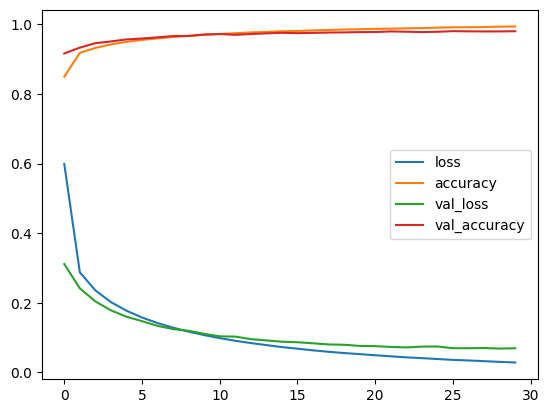

In [61]:
pd.DataFrame(history.history).plot()

In [63]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.4330 - accuracy: 0.0974


[2.4330146312713623, 0.09740000218153]

**Checking SAMPLE DATA on trained ANN**

In [66]:
x_new=X_test[:3]
#x_new

In [67]:
actual=y_test[:3]

In [68]:
actual

array([7, 2, 1], dtype=uint8)

In [75]:
y_prob=model_clf.predict(x_new)
y_prob.round(1)

1/1 [==============================] - 0s 18ms/step


array([[0. , 0.1, 0.1, 0. , 0.1, 0.2, 0.1, 0.1, 0.2, 0.1],
       [0. , 0.1, 0.1, 0. , 0.1, 0.2, 0.1, 0.1, 0.2, 0.1],
       [0. , 0.1, 0.1, 0. , 0.1, 0.2, 0.1, 0.1, 0.2, 0.1]], dtype=float32)

<Axes: >

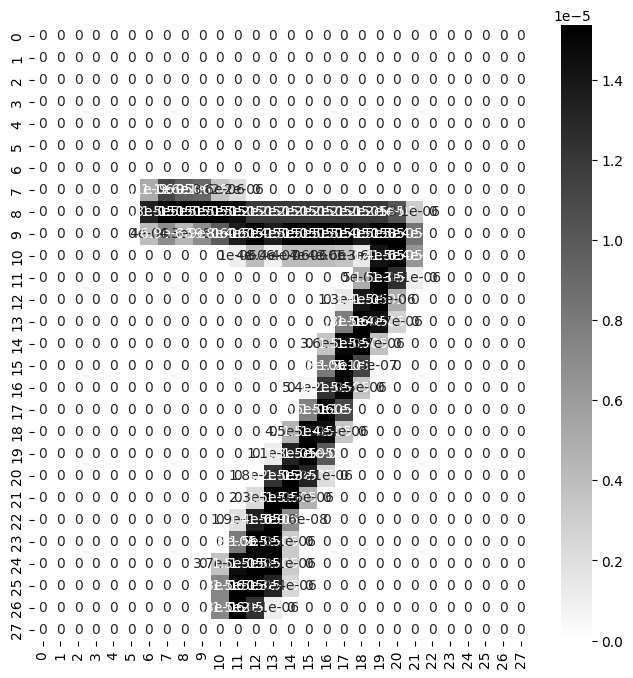

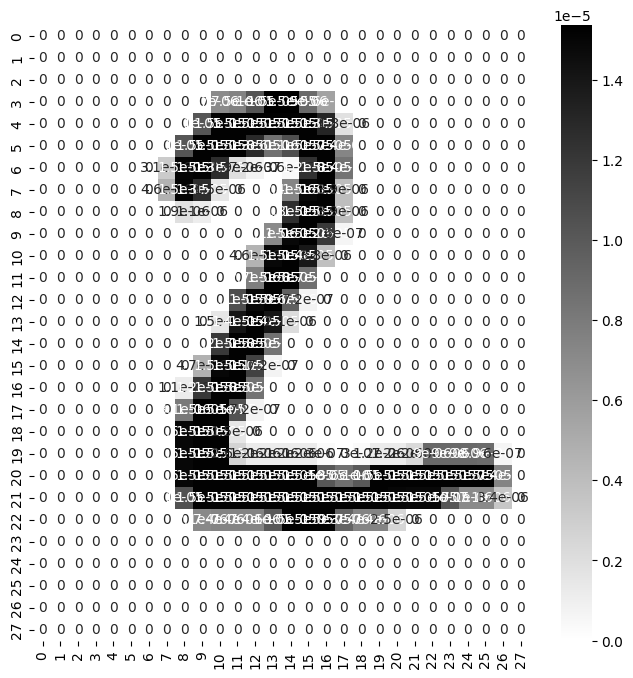

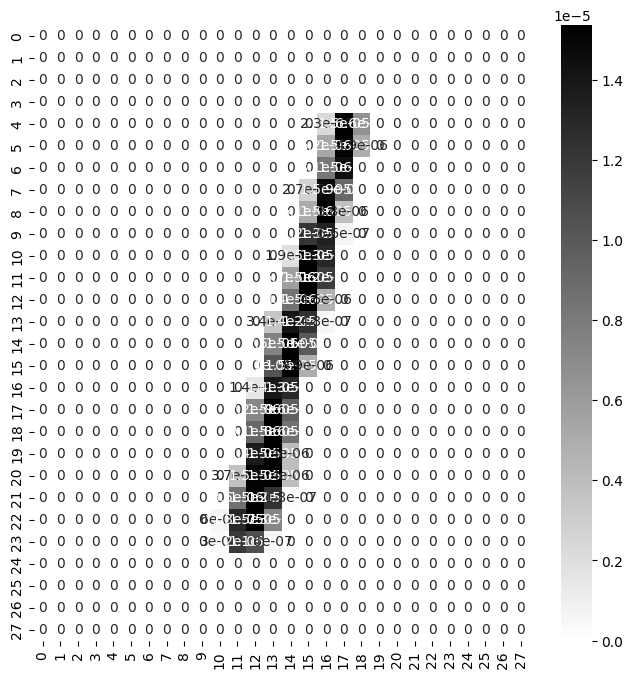

In [73]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[0],annot=True,cmap="binary")
plt.figure(figsize=(8,8))
sns.heatmap(X_test[1],annot=True,cmap="binary")
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2],annot=True,cmap="binary")


In [76]:
y_prob=model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 83ms/step


array([[0.042, 0.076, 0.114, 0.049, 0.097, 0.182, 0.083, 0.066, 0.205,
        0.085],
       [0.042, 0.076, 0.114, 0.049, 0.097, 0.182, 0.083, 0.066, 0.205,
        0.085],
       [0.042, 0.076, 0.114, 0.049, 0.097, 0.182, 0.083, 0.066, 0.205,
        0.085]], dtype=float32)

In [78]:
y_prob=np.argmax(y_prob, axis=-1)

In [79]:
y_prob

array([8, 8, 8])